In [168]:
import pandas as pd
import nltk as tm
from nltk.corpus import stopwords
import wordcloud
import matplotlib as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [169]:
pwd

'c:\\Users\\Stenh\\OneDrive - Uppsala universitet\\Termin 4\\Examensarbete_analys'

<h1>Inläsning, transformering och kontroll av data</h1>

In [170]:

df = pd.read_csv("100svar.csv", encoding="utf-8", delimiter = ",")

In [171]:
df = df.drop(df.index[:3])
df = df.reset_index(drop=True)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 42 columns):
 #   Column                                                                                                              Non-Null Count  Dtype 
---  ------                                                                                                              --------------  ----- 
 0   Tidstämpel                                                                                                          97 non-null     object
 1   Kön                                                                                                                 97 non-null     object
 2   Vilken årskurs går du i?                                                                                            97 non-null     object
 3   Vilket av följande beskriver bäst ditt program?                                                                     97 non-null     object
 4   Hur många invånare har orten

In [173]:
df.drop(columns="Tidstämpel", axis=1, inplace=True)

In [174]:
kolumner_att_konvertera = df.columns[:4]

# Konvertera datatypen för de valda kolumnerna till 'category'
df[kolumner_att_konvertera] = df[kolumner_att_konvertera].astype('category')


In [175]:
df['Hur många invånare har orten där du bor?'] = df['Hur många invånare har orten där du bor?'].replace({
    "0-10 000": "liten",
    "10-50 000": "liten",
    "50-100 000": "medel",
    "100-200 000": "stor",
    "200 000+": "stor"
})

C:\Users\Stenh\AppData\Local\Temp\ipykernel_19564\2101176683.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Hur många invånare har orten där du bor?'] = df['Hur många invånare har orten där du bor?'].replace({


In [176]:
kolumner_att_ändra = df.columns[[6, 7, 8, 9, 10]]

df[kolumner_att_ändra] = df[kolumner_att_ändra].replace({
    7: 1,
    6: 2,
    5: 3,
    3: 5,
    2: 6,
    7: 1
})

In [177]:
print(kolumner_att_ändra)

Index(['Jag väljer "Godkänn alla cookies".', 'Jag väljer "Tillåt alla". ',
       'Jag väljer "Acceptera alla cookies". ',
       'Jag väljer "Acceptera alla cookies". .1',
       'Jag väljer "Tillåt alla". .1'],
      dtype='object')


<h1>Kategorisering</h1>

In [178]:
df_demografi = df.iloc[:,:6]

In [179]:
# Välj kolumnerna med index 19 till 27 (slutet är exklusivt så vi tar upp till 28)
utvalda_k = df.iloc[:, 17:29]
utvalda_k1 = df.iloc[:, 17:23]
utvalda_k2 = df.iloc[:, 23:29]
utvalda_a = df.iloc[:, 29:]
utvalda_a1 = df.iloc[:, 29:37]
utvalda_a2 = df.iloc[:, 37:]
utvalda_b = df.iloc[:, 6:17]
utvalda_b1_dark = df.iloc[:,[6,7,9]]
utvalda_b1_no_dark = df.iloc[:,[8,10]]
utvalda_b2 = df.iloc[:, 11:14]
utvalda_b3 = df.iloc[:, 14:17]

# Platta ut alla värden till en lång array och räkna ut medelvärde
medelvärde_k = utvalda_k.values.flatten().mean()
medelvärde_k1 = utvalda_k1.values.flatten().mean()
medelvärde_k2 = utvalda_k2.values.flatten().mean()
medelvärde_a = utvalda_a.values.flatten().mean()
medelvärde_a1 = utvalda_a1.values.flatten().mean()
medelvärde_a2 = utvalda_a2.values.flatten().mean()
medelvärde_b = utvalda_b.values.flatten().mean()
medelvärde_b1_dark = utvalda_b1_dark.values.flatten().mean()
medelvärde_b1_no_dark = utvalda_b1_no_dark.values.flatten().mean()
medelvärde_b2 = utvalda_b2.values.flatten().mean()
medelvärde_b3 = utvalda_b3.values.flatten().mean()

# Skapa ny DataFrame med en kolumn "K" och medelvärdet som enda värde
df_kategoriserad = pd.DataFrame({
                      'K': [medelvärde_k],
                      'K_grundläggande': [medelvärde_k1],
                      'K_integritet': [medelvärde_k2],
                      'A': [medelvärde_a],
                      'A_egen_data': [medelvärde_a1],
                      'A_gen_insamling': [medelvärde_a2],
                      'B': [medelvärde_b],
                      'B_bilder_dark': [medelvärde_b1_dark],
                      'B_bilder_no_dark': [medelvärde_b1_no_dark],
                      'B2_agerande': [medelvärde_b2],
                      'B3_aktivt agerande': [medelvärde_b3]
                      })

In [180]:
df_kategoriserad.head()

,K,K_grundläggande,K_integritet,A,A_egen_data,A_gen_insamling,B,B_bilder_dark,B_bilder_no_dark,B2_agerande,B3_aktivt agerande
0,3.839347,3.652921,4.025773,4.246564,4.131443,4.476804,2.470478,2.024055,2.242268,2.996564,2.542955


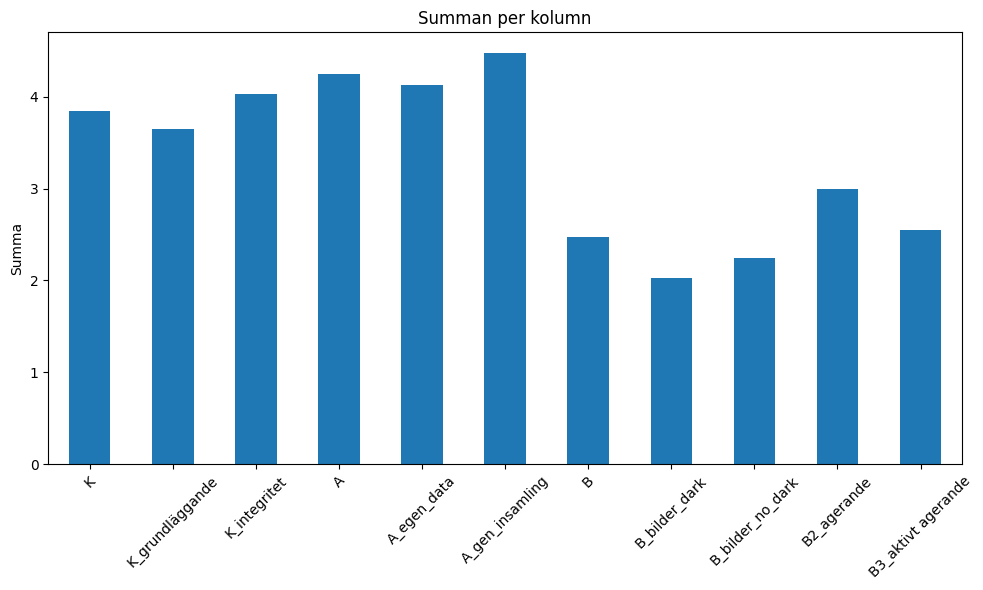

In [197]:
df_kategoriserad.sum().plot(kind='bar', figsize=(10, 6))
plt.title('Summan per kolumn')
plt.ylabel('Summa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [181]:

medel_k = df.iloc[:, 17:29].mean(axis=1).round(2)
medel_k1 = df.iloc[:, 17:23].mean(axis=1)
medel_k2 = df.iloc[:, 23:29].mean(axis=1)
medel_a = df.iloc[:, 29:].mean(axis=1)
medel_a1 = df.iloc[:, 29:37].mean(axis=1)
medel_a2 = df.iloc[:, 37:].mean(axis=1)
medel_b = df.iloc[:, 6:17].mean(axis=1)
medel_b1_dark = df.iloc[:,[6,7,9]].mean(axis=1)
medel_b1_no_dark = df.iloc[:,[8,10]].mean(axis=1)
medel_b2 = df.iloc[:, 11:14].mean(axis=1)
medel_b3 = df.iloc[:, 14:17].mean(axis=1)


df_resp_sum = pd.DataFrame({
                      'Kön': df.iloc[:,0],
                      'Årskurs': df.iloc[:,1],
                      'Program': df.iloc[:,2],
                      'Invånare': df.iloc[:,3],
                      'K': medel_k,
                      'K_grundläggande': medel_k1,
                      'K_integritet': medel_k2,
                      'A': medel_a,
                      'A_egen_data': medel_a1,
                      'A_gen_insamling': medel_a2,
                      'B': medel_b,
                      'B_bilder_dark': medel_b1_dark,
                      'B_bilder_no_dark': medel_b1_no_dark,
                      'B2_agerande': medel_b2,
                      'B3_aktivt agerande': medel_b3
                      })

In [182]:
df_resp_sum.head()

,Kön,Årskurs,Program,Invånare,K,K_grundläggande,K_integritet,A,A_egen_data,A_gen_insamling,B,B_bilder_dark,B_bilder_no_dark,B2_agerande,B3_aktivt agerande
0,Kvinna,Årskurs 3,Samhällsvetenskap,liten,2.33,1.166667,3.500000,4.666667,4.375,5.25,1.000000,1.000000,1.0,1.000000,1.000000
1,Kvinna,Årskurs 3,Naturvetenskap,liten,5.08,4.666667,5.500000,4.416667,4.250,4.75,2.727273,1.666667,2.0,4.000000,3.000000
2,Kvinna,Årskurs 3,Naturvetenskap,medel,2.92,2.833333,3.000000,5.083333,5.125,5.00,2.363636,2.666667,1.0,1.666667,3.666667
3,Kvinna,Årskurs 3,Naturvetenskap,medel,1.50,2.000000,1.000000,6.833333,6.750,7.00,1.000000,1.000000,1.0,1.000000,1.000000
4,Vill ej ange,Årskurs 2,Samhällsvetenskap,liten,5.58,5.500000,5.666667,4.166667,4.375,3.75,2.818182,1.000000,1.0,4.333333,4.333333


<h1>Demografi</h1>

In [183]:
df_demografi.head()

,Kön,Vilken årskurs går du i?,Vilket av följande beskriver bäst ditt program?,Hur många invånare har orten där du bor?,Jag känner till GDPR.,Jag litar på att hemsidor hanterar mina personuppgifter på ett ansvarsfullt sätt.
0,Kvinna,Årskurs 3,Samhällsvetenskap,liten,5,3
1,Kvinna,Årskurs 3,Naturvetenskap,liten,6,6
2,Kvinna,Årskurs 3,Naturvetenskap,medel,2,5
3,Kvinna,Årskurs 3,Naturvetenskap,medel,5,3
4,Vill ej ange,Årskurs 2,Samhällsvetenskap,liten,5,4


<module 'matplotlib' from 'C:\\Users\\Stenh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python313\\site-packages\\matplotlib\\__init__.py'>

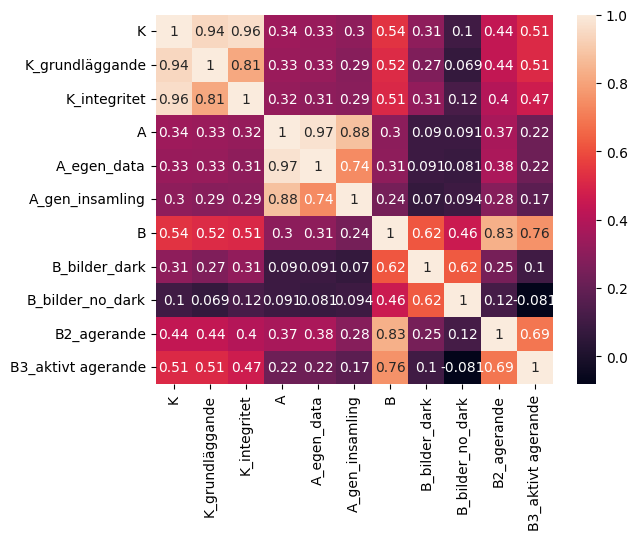

In [184]:
df_number = df_resp_sum.select_dtypes(include='number')
matrix = df_number.corr()
sns.heatmap(matrix,annot=True)
plt

<h1>Medelvärde av kategorier</h1>

<h1>Reliabilitetstest</h1>

In [185]:
def cronbach_alpha(df):
  k = df.shape[1]
  varians_total = df.sum(axis=1).var(ddof=1)
  varians_frågor = df.var(axis=0,ddof=1).sum()

  alpha = (k / (k - 1)) * (1 - varians_frågor / varians_total)

  return round(alpha, 3)

In [186]:
k_rel = cronbach_alpha(utvalda_k)
k1_rel = cronbach_alpha(utvalda_k1)
k2_rel = cronbach_alpha(utvalda_k2)

a_rel = cronbach_alpha(utvalda_a)
a1_rel = cronbach_alpha(utvalda_a1)
a2_rel = cronbach_alpha(utvalda_a2)

b_rel = cronbach_alpha(utvalda_b)
b1_dark_rel = cronbach_alpha(utvalda_b1_dark)
b1_no_dark_rel = cronbach_alpha(utvalda_b1_no_dark)
b2_rel = cronbach_alpha(utvalda_b2)
b3_rel = cronbach_alpha(utvalda_b3)

attityd = cronbach_alpha(df.iloc[:,29:])
beteende = cronbach_alpha(df.iloc[:, 6:17])
Beteende_bilder = cronbach_alpha(df.iloc[:, 11:17])
print("Kunskap =", k_rel, k1_rel, k2_rel, "attityd =", a_rel, a1_rel, a2_rel, "beteende =", b_rel, b1_dark_rel,b1_no_dark_rel,b2_rel,b3_rel)

Kunskap = 0.955 0.911 0.943 attityd = 0.93 0.921 0.803 beteende = 0.808 0.875 0.799 0.726 0.802


<h1>Korrelationstest</h1>

In [187]:
korrelation = df_resp_sum.iloc[:,4:].corr(method='pearson')

<module 'matplotlib' from 'C:\\Users\\Stenh\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python313\\site-packages\\matplotlib\\__init__.py'>

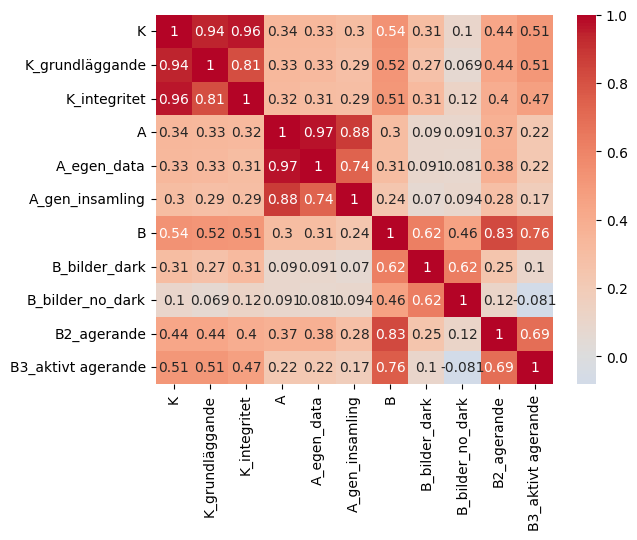

In [188]:
sns.heatmap(korrelation, annot=True, cmap='coolwarm', center=0)
plt

<h1>SEM</h1>

In [189]:
!pip install semopy

Defaulting to user installation because normal site-packages is not writeable


In [190]:
# 1. INSTALLERA nödvändiga paket först via terminal:
# pip install pandas semopy openpyxl

import pandas as pd
from semopy import Model, Optimizer
from semopy.inspector import inspect

# # 2. LÄS IN DIN CSV
# df = pd.read_csv("Undersökning om gymnasieelevers cookie-hantering (Svar) - Formulärsvar 1.csv")
# df.columns = df.columns.str.strip()

# 3. DEFINIERA KAB-GRUPPER baserat på index
behavior_cols = df.columns[5:17].tolist()
knowledge_cols = df.columns[17:29].tolist()
attitude_cols = df.columns[29:].tolist()

# 4. DÖP OM kolumner till enklare namn
rename_map = {}
for i, col in enumerate(knowledge_cols):
    rename_map[col] = f"K{i+1}"
for i, col in enumerate(attitude_cols):
    rename_map[col] = f"A{i+1}"
for i, col in enumerate(behavior_cols):
    rename_map[col] = f"B{i+1}"

df_clean = df.rename(columns=rename_map)

# 5. SKAPA MODELL i semopy-syntax
model_desc = f"""
Knowledge =~ {' + '.join(rename_map[c] for c in knowledge_cols)}
Attitude  =~ {' + '.join(rename_map[c] for c in attitude_cols)}
Behavior  =~ {' + '.join(rename_map[c] for c in behavior_cols)}

Attitude ~ Knowledge
Behavior ~ Attitude
"""

# 6. Rensa bort tomma rader för SEM
df_clean = df_clean.dropna(subset=rename_map.values())

# 7. BYGG OCH TRÄNA MODELLEN
model = Model(model_desc)
model.fit(df_clean)

# 8. VISA RESULTAT
results = inspect(model)
print("\n--- SEM Resultat (koefficienter & p-värden) ---")
print(results)





--- SEM Resultat (koefficienter & p-värden) ---
        lval  op       rval  Estimate  Std. Err   z-value   p-value
0   Attitude   ~  Knowledge  0.339025  0.111175  3.049478  0.002292
1   Behavior   ~   Attitude -0.028018  0.043087 -0.650277  0.515514
2         K1   ~  Knowledge  1.000000         -         -         -
3         K2   ~  Knowledge  1.241245  0.129366  9.594838       0.0
4         K3   ~  Knowledge  0.962468   0.13993  6.878196       0.0
..       ...  ..        ...       ...       ...       ...       ...
72        K5  ~~         K5  1.534134  0.233191  6.578874       0.0
73        K6  ~~         K6  0.844075  0.140196  6.020678       0.0
74        K7  ~~         K7  1.574712  0.243645  6.463152       0.0
75        K8  ~~         K8  1.018815  0.168189   6.05756       0.0
76        K9  ~~         K9  1.103882  0.181191  6.092354       0.0

[77 rows x 7 columns]


In [191]:
from semopy.inspector import inspect

# Hämta standardiserade värden
estimates = inspect(model)

# Räkna ut R² manuellt
def calculate_r2(est_df, dependent_var):
    effects = est_df[(est_df["op"] == "~") & (est_df["lval"] == dependent_var)]
    r2 = sum(effects["Estimate"]**2)
    return r2

dependent_vars = ["Attitude", "Behavior"]

print("\n--- R² för beroende latenta variabler ---")
for var in dependent_vars:
    r2_val = calculate_r2(estimates, var)
    print(f"{var}: {r2_val:.3f}")




--- R² för beroende latenta variabler ---
Attitude: 0.115
Behavior: 0.001


In [192]:
from semopy import semplot

# Skapa en PDF- eller PNG-bild av modellen
semplot(model, 'kab_model.png')  # eller .pdf
print("Modellen är sparad som kab_model.png")


Modellen är sparad som kab_model.png


<h1>T-test/ANOVA</h1>

***T-Test för grupper som känner till/ inte känner till GDPR***

-   Resultaten från t-testerna visar att det inte finns några statistiskt signifikanta skillnader i kunskap, attityd eller beteende mellan elever som rapporterar låg respektive hög kännedom om GDPR (p > 0.05). Detta tyder på att självupplevd GDPR-kännedom inte nödvändigtvis innebär en djupare förståelse för cookies, inte heller en mer integritetsmedveten attityd eller förändrat beteende. Resultatet kan ses i ljuset av den så kallade privacy paradox, där individer uttrycker oro för sin integritet men inte agerar i linje med denna oro. Det antyder att insatser som syftar till att öka medvetenheten om integritet behöver gå bortom ren informationsspridning och i stället fokusera på att öka faktisk förståelse och användarkompetens.

In [193]:
df_tTest = df_resp_sum.copy()

gdpr_kännedom = df.iloc[:, 31]

df_tTest['Integritet_online'] = gdpr_kännedom

låg_kännedom = df_tTest[df_tTest['Integritet_online'] < 4]
hög_kännedom = df_tTest[df_tTest['Integritet_online'] > 4]

from scipy.stats import ttest_ind

t_k = ttest_ind(hög_kännedom['K'], låg_kännedom['K'], nan_policy='omit')
t_a = ttest_ind(hög_kännedom['A'], låg_kännedom['A'], nan_policy='omit')
t_b = ttest_ind(hög_kännedom['B'], låg_kännedom['B'], nan_policy='omit')

print("📘 T-test: Kunskap (K)")
print(f"  t = {t_k.statistic:.3f}, p = {t_k.pvalue:.4f}")

print("📗 T-test: Attityd (A)")
print(f"  t = {t_a.statistic:.3f}, p = {t_a.pvalue:.4f}")

print("📙 T-test: Beteende (B)")
print(f"  t = {t_b.statistic:.3f}, p = {t_b.pvalue:.4f}")




📘 T-test: Kunskap (K)
  t = 3.906, p = 0.0002
📗 T-test: Attityd (A)
  t = 6.368, p = 0.0000
📙 T-test: Beteende (B)
  t = 3.444, p = 0.0009


In [195]:
import matplotlib.pyplot as plt

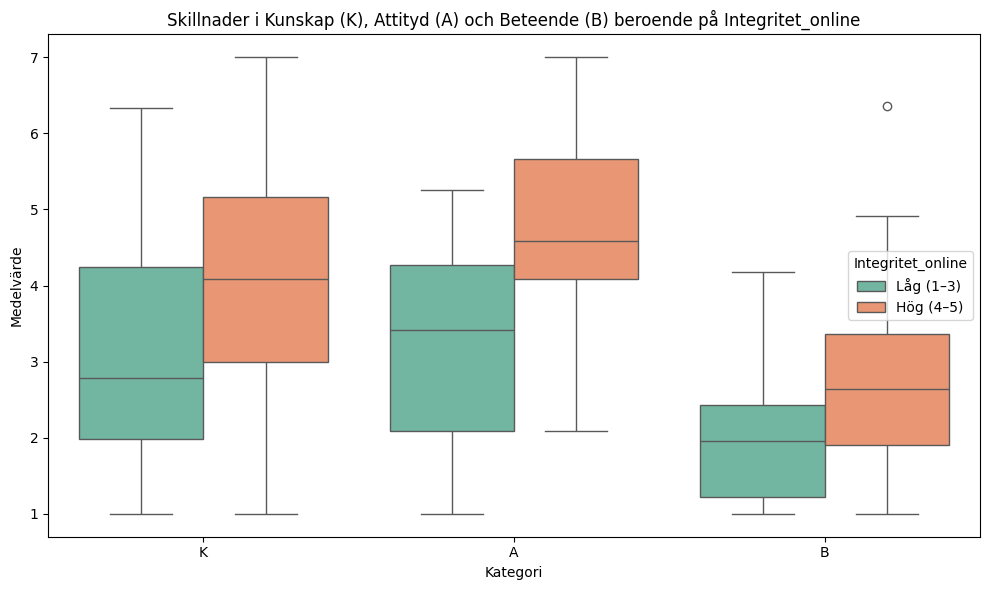

In [196]:
df_tTest['Integritet_online_grupp'] = df_tTest['Integritet_online'].apply(
    lambda x: 'Låg (1–3)' if x < 4 else 'Hög (4–5)'
)

df_melted = df_tTest.melt(id_vars="Integritet_online_grupp", value_vars=["K", "A", "B"],
                          var_name="Kategori", value_name="Värde")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Kategori", y="Värde", hue="Integritet_online_grupp", palette="Set2")
plt.title("Skillnader i Kunskap (K), Attityd (A) och Beteende (B) beroende på Integritet_online")
plt.ylabel("Medelvärde")
plt.xlabel("Kategori")
plt.legend(title="Integritet_online")
plt.tight_layout()
plt.show()



***T-TEst för skillnad mellan kön***

Resultaten från t-tester visar att det finns en statistiskt signifikant könsskillnad i både kunskapsnivå och beteende kopplat till cookies, men inte i attityd. Män och kvinnor skiljer sig alltså i hur mycket de vet om cookies, samt hur de agerar i praktiken (t.ex. raderar cookies eller blockerar spårning), men har en liknande inställning till datainsamling. Det antyder att kön kan vara en relevant faktor vid utformning av informationsinsatser, särskilt om målet är att öka faktisk förståelse eller förändra beteende. Att attityden däremot inte skiljer sig kan tyda på att både män och kvinnor i liknande grad värderar digital integritet, men att de omsätter den i handling på olika sätt.

In [ ]:
from scipy.stats import ttest_ind

# Lägg till kön i df_resp_sum (index 1 = könskolumn i ursprunglig df)


# Skapa två grupper
kvinnor = df_resp_sum[df_resp_sum['Kön'] == 'Kvinna']
män = df_resp_sum[df_resp_sum['Kön'] == 'Man']

# Kör t-tester för K, A, B
t_k = ttest_ind(kvinnor['K'], män['K'], nan_policy='omit')
t_a = ttest_ind(kvinnor['A'], män['A'], nan_policy='omit')
t_b = ttest_ind(kvinnor['B'], män['B'], nan_policy='omit')

# Visa resultat
print("📘 T-test: Kunskap (Könsskillnad)")
print(f"  t = {t_k.statistic:.3f}, p = {t_k.pvalue:.4f}")

print("📗 T-test: Attityd (Könsskillnad)")
print(f"  t = {t_a.statistic:.3f}, p = {t_a.pvalue:.4f}")

print("📙 T-test: Beteende (Könsskillnad)")
print(f"  t = {t_b.statistic:.3f}, p = {t_b.pvalue:.4f}")


📘 T-test: Kunskap (Könsskillnad)
  t = -3.079, p = 0.0028
📗 T-test: Attityd (Könsskillnad)
  t = 0.930, p = 0.3548
📙 T-test: Beteende (Könsskillnad)
  t = -2.903, p = 0.0047


In [ ]:
print(kvinnor['B'].mean(), män['B'].mean())

2.090909090909091 2.7838765008576334


In [ ]:
import matplotlib.pyplot as plt


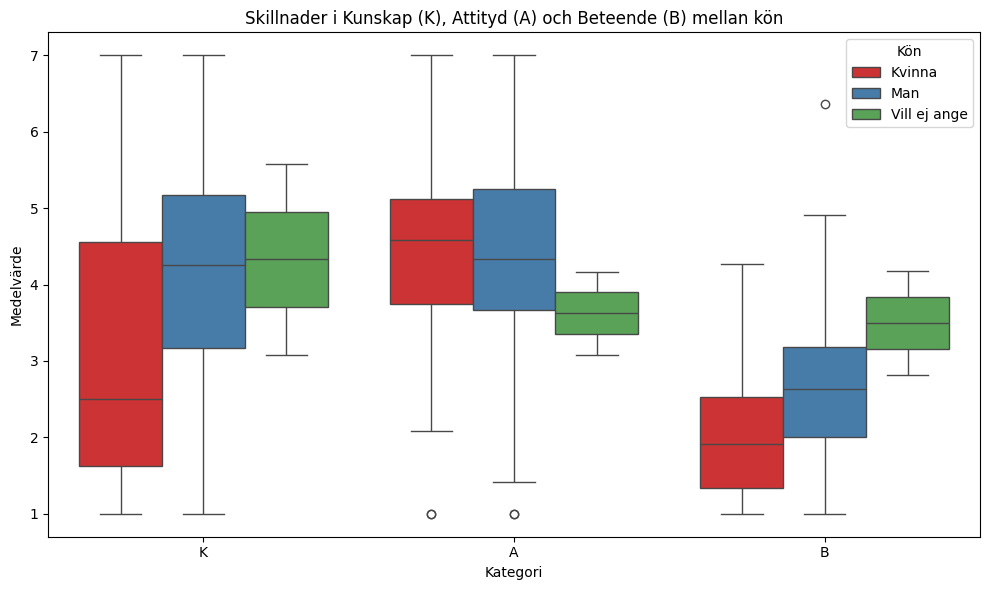

In [ ]:
# Gör om till långform för seaborn
df_melted = df_resp_sum.melt(id_vars="Kön", value_vars=["K", "A", "B"], 
                             var_name="Kategori", value_name="Värde")

# Rita boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x="Kategori", y="Värde", hue="Kön", palette="Set1")
plt.title("Skillnader i Kunskap (K), Attityd (A) och Beteende (B) mellan kön")
plt.ylabel("Medelvärde")
plt.xlabel("Kategori")
plt.legend(title="Kön")
plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import ttest_rel

# Exempel – byt till dina faktiska kolumnnamn!
t_stat, p_value = ttest_rel(df_resp_sum['B_bilder_no_dark'], df_resp_sum['B_bilder_dark'])

print("📊 Parat t-test – benägenhet att neka cookies")
print(f"  t = {t_stat:.3f}, p = {p_value:.4f}")


📊 Parat t-test – benägenhet att neka cookies
  t = 1.242, p = 0.2175


C:\Users\Stenh\AppData\Local\Temp\ipykernel_19564\3881499562.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")
C:\Users\Stenh\AppData\Local\Temp\ipykernel_19564\3881499562.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")


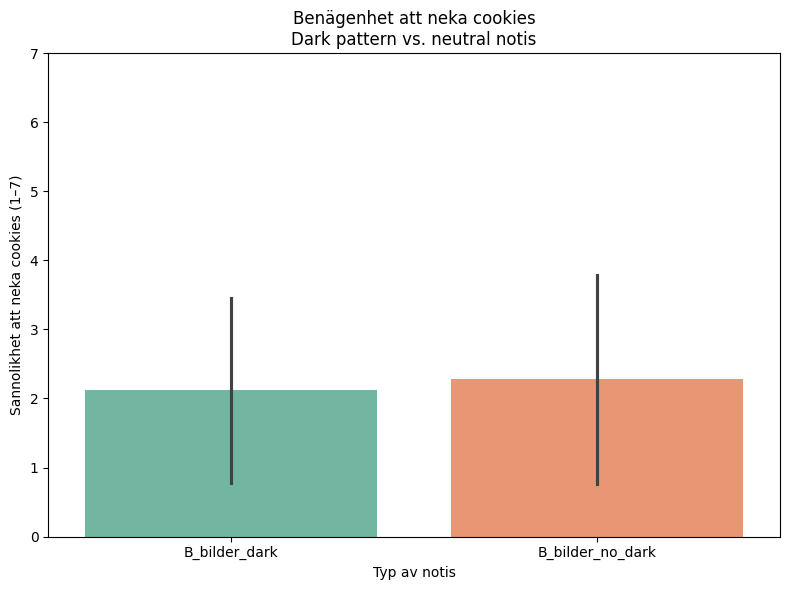

In [ ]:
# Smält till lång format för seaborn
df_melted = df_resp_sum.melt(value_vars=["B_bilder_dark", "B_bilder_no_dark"],
                           var_name="Typ av notis", value_name="Svar")

# Rita barplot med medelvärden
plt.figure(figsize=(8, 6))
sns.barplot(data=df_melted, x="Typ av notis", y="Svar", palette="Set2", ci="sd")
plt.title("Benägenhet att neka cookies\nDark pattern vs. neutral notis")
plt.ylabel("Sannolikhet att neka cookies (1–7)")
plt.xlabel("Typ av notis")
plt.ylim(0, 7)
plt.tight_layout()
plt.show()

In [ ]:
df_resp_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Kön                 87 non-null     category
 1   Årskurs             87 non-null     category
 2   Program             87 non-null     category
 3   Invånare            87 non-null     category
 4   K                   87 non-null     float64 
 5   K_grundläggande     87 non-null     float64 
 6   K_integritet        87 non-null     float64 
 7   A                   87 non-null     float64 
 8   A_egen_data         87 non-null     float64 
 9   A_gen_insamling     87 non-null     float64 
 10  B                   87 non-null     float64 
 11  B_bilder_dark       87 non-null     float64 
 12  B_bilder_no_dark    87 non-null     float64 
 13  B2_agerande         87 non-null     float64 
 14  B3_aktivt agerande  87 non-null     float64 
dtypes: category(4), float64(11)
memory usage: 